# Database examples

In [1]:
from IPhreeqcPy import IPhreeqc

In [2]:
import urllib.request

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
p=IPhreeqc()

In [6]:
urllib.request.urlretrieve('http://scicorner.com/askja/askja.dat', 'askja.dat')

('askja.dat', <http.client.HTTPMessage at 0x2046623c708>)

In [7]:
p.LoadDatabase('askja.dat')

## Seawater speciation

In [8]:
p.RunString('''
SELECTED_OUTPUT
    -reset false
    -molalities Na+ NaSO4- NaHCO3 NaCO3-
        Mg+2 MgSO4 MgHCO3+ MgCO3
        Ca+2 CaSO4 CaHCO3+ CaCO3
        K+ KSO4-

SOLUTION 1
    units mol/kgw
    temp 25
    pH 8.04
    density 1.023
    Na 0.4860597
    Mg 0.0547421
    Ca 0.0106568
    K  0.0105797
    Cl 0.5657647
    S(6) 0.0292643
    Alkalinity 0.0023
''')

In [9]:
res = p.GetSelectedOutputArray()
res = pd.DataFrame(pd.Series(data=res[1], index=res[0], name='Conc. / mol/kgw'))
res['Element'] = [
    'Na', 'Na', 'Na', 'Na',
    'Mg', 'Mg', 'Mg', 'Mg',
    'Ca', 'Ca', 'Ca', 'Ca',
    'K', 'K'
]
res['Anion'] = [
    'Free', 'Sulfate', 'Bicarbonate', 'Carbonate',
    'Free', 'Sulfate', 'Bicarbonate', 'Carbonate',
    'Free', 'Sulfate', 'Bicarbonate', 'Carbonate',
    'Free', 'Sulfate'
]

In [10]:
totals = res.groupby('Element')['Conc. / mol/kgw'].sum()

In [11]:
res['Rel. conc / %'] = res.apply(lambda x: x['Conc. / mol/kgw'] / totals[x['Element']] * 100, axis=1)

In [12]:
pivot = res.pivot(index='Element', columns='Anion', values='Rel. conc / %')
pivot

Anion,Bicarbonate,Carbonate,Free,Sulfate
Element,,,,
Ca,0.343991,0.215973,90.556968,8.883069
K,NaN,NaN,97.903093,2.096907
Mg,0.498011,0.155163,85.395770,13.951056
Na,0.049093,0.005979,98.449625,1.495304


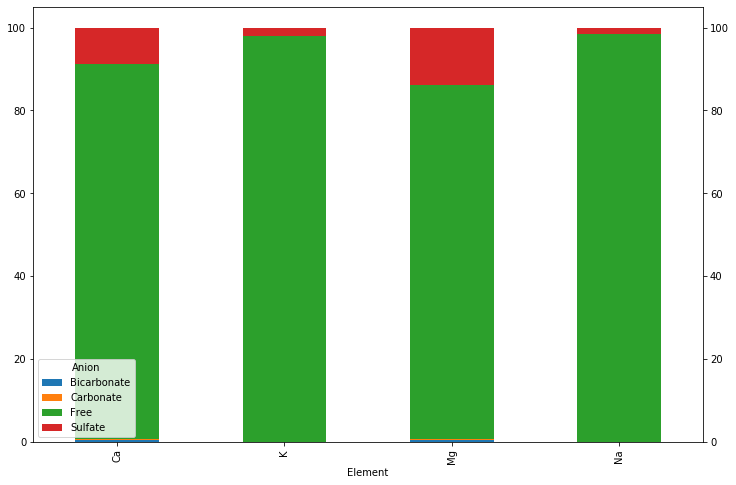

In [13]:
pivot.plot.bar(stacked=True)